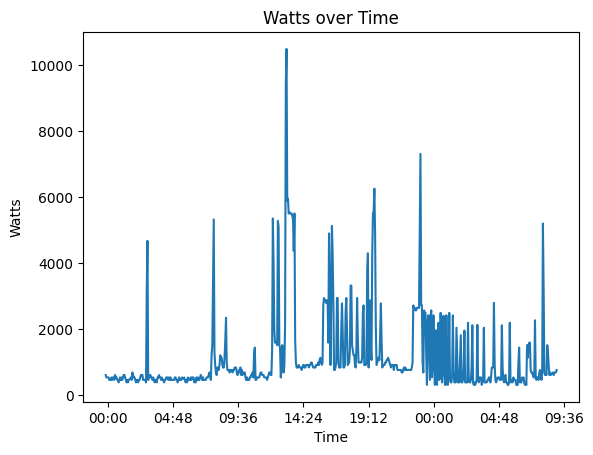

In [93]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter

# File path to the data file
data_file_path = "/home/rob/power.log"

# Constants for impulse wraparound and conversion
IMPULSE_MAX = 65536  # 2^16
SECONDS_IN_MINUTE = 60

# Lists to store time and rate data for plotting
timestamps = []
rates = []

# Initialize the plot
plt.ion()
fig, ax = plt.subplots()
plot_line, = ax.plot([], [], '-')  # Renamed to avoid conflict

# Set x-axis format to display only time of day
time_formatter = DateFormatter("%H:%M")  # Hour:Minute format
ax.xaxis.set_major_formatter(time_formatter)

# Variables to keep track of impulses and time
previous_time = None
previous_impulses = None

# Read data from the file
with open(data_file_path, 'r') as file:
    for line in file:
        try:
            # Parse each JSON line
            payload = json.loads(line.strip())
            if "time" in payload and "impulses" in payload:
                # Convert Unix timestamp to datetime object
                current_time = datetime.fromtimestamp(int(payload["time"]))
                current_impulses = payload["impulses"]

                # Calculate rate if previous values exist
                if previous_time is not None and previous_impulses is not None:
                    time_diff = (current_time - previous_time).total_seconds() / SECONDS_IN_MINUTE  # Convert to minutes

                    # Calculate impulse difference with wraparound handling
                    if current_impulses >= previous_impulses:
                        impulse_diff = current_impulses - previous_impulses
                    else:
                        impulse_diff = (IMPULSE_MAX - previous_impulses) + current_impulses

                    # Check if time difference is valid to avoid division by zero
                    if time_diff > 2:
                        rate = impulse_diff / time_diff  # Impulses per minute
                        watts = rate * SECONDS_IN_MINUTE  # Convert impulses per minute to watts

                        # Update the lists for plotting
                        timestamps.append(current_time)
                        rates.append(watts)

                        # Update the plot
                        plot_line.set_data(timestamps, rates)
                        ax.relim()
                        ax.autoscale_view()
                        fig.canvas.draw()
                        fig.canvas.flush_events()

                # Update previous values
                previous_time = current_time
                previous_impulses = current_impulses

        except json.JSONDecodeError:
            print("Invalid JSON format in line:", line)
        except ValueError as ve:
            print("Error processing time or impulses:", ve)

# Plot settings
ax.set_title("Watts over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Watts")

# Finalize and show the plot
plt.ioff()
plt.savefig('power.png')
# plt.show()


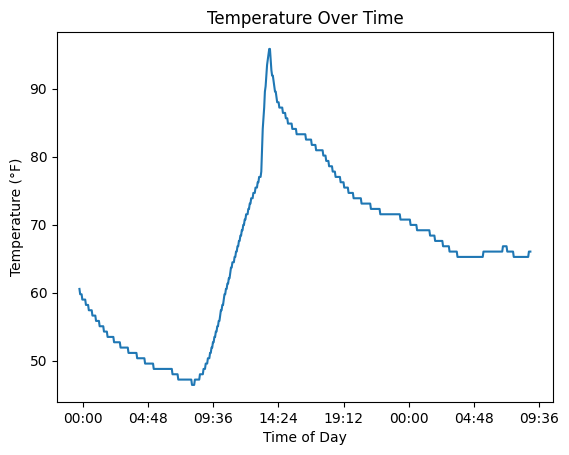

In [92]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter

# File path to the data file
data_file_path = "/home/rob/power.log"

# Lists to store time and temperature data for plotting
timestamps = []
temperatures_F = []

# Initialize the plot
plt.ion()
fig, ax = plt.subplots()
temp_line, = ax.plot([], [], '-')  # Line object for temperature

# Set x-axis format to display only time of day
time_formatter = DateFormatter("%H:%M")  # Hour:Minute format
ax.xaxis.set_major_formatter(time_formatter)

# Read data from the file
with open(data_file_path, 'r') as file:
    for line in file:
        try:
            # Parse each JSON line
            payload = json.loads(line.strip());
            if "time" in payload and "temperature_C" in payload:
                # Convert Unix timestamp to datetime object
                current_time = datetime.fromtimestamp(int(payload["time"]))
                temperature_C = payload["temperature_C"]

                # Convert temperature to Fahrenheit
                temperature_F = (temperature_C * 9/5) + 32

                # Update the lists for plotting
                timestamps.append(current_time)
                temperatures_F.append(temperature_F)

                # Update the plot
                temp_line.set_data(timestamps, temperatures_F)
                ax.relim()
                ax.autoscale_view()
                fig.canvas.draw()
                fig.canvas.flush_events()

        except json.JSONDecodeError:
            print("Invalid JSON format in line:", line)
        except ValueError as ve:
            print("Error processing time or temperature:", ve)

# Plot settings
ax.set_title("Temperature Over Time")
ax.set_xlabel("Time of Day")
ax.set_ylabel("Temperature (°F)")

# Finalize and show the plot
plt.ioff()
# plt.show()
plt.savefig('temperature.png')
